In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import geopandas as gpd

/home/adarshm26/envs/dwdm_assignment/lib/python3.8/site-packages/geopandas/_compat.py:84: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  warnings.warn(


In [5]:
india_districts = gpd.read_file('India_Districts_ADM2_GADM.shp')
india_districts.head()

,FID,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,NL_NAME_2,VARNAME_2,TYPE_2,ENGTYPE_2,geometry
0,1,105,IND,India,17,Karnataka,239,Shimoga,None,None,District,District,"POLYGON ((75.12553 14.62678, 75.13207 14.62507..."
1,2,105,IND,India,17,Karnataka,240,Tumkur,None,None,District,District,"MULTIPOLYGON (((76.97153 14.05239, 76.94973 14..."
2,3,105,IND,India,17,Karnataka,241,Udupi,None,None,District,District,"MULTIPOLYGON (((74.78125 13.09931, 74.78069 13..."
3,4,105,IND,India,1,Andaman and Nicobar,1,Andaman Islands,None,None,District,District,"MULTIPOLYGON (((92.51583 10.89764, 92.51611 10..."
4,5,105,IND,India,17,Karnataka,242,Uttar Kannand,None,None,District,District,"MULTIPOLYGON (((74.48292 14.01125, 74.48292 14..."


<AxesSubplot:>

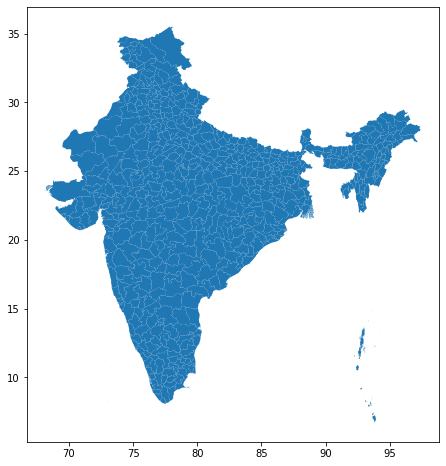

In [6]:
india_districts.plot(figsize = (8,8))

In [15]:
from os import listdir

complete_aqi_file_list = [f for f in listdir('.') if '.csv' in f]
aqi_data_list = []
for file in complete_aqi_file_list:
    aqi_data_list.append(pd.read_csv(file, sep=',', header=0))
aqi_data = pd.concat(aqi_data_list)
aqi_data.head(5)

,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPM/PM10,PM 2.5,Unnamed: 11
0,55,05-01-15,Delhi,Delhi,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,44.0,203.0,NaN,NaN
1,55,08-01-15,Delhi,Delhi,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,45.0,214.0,NaN,NaN
2,55,13-01-15,Delhi,Delhi,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,47.0,182.0,NaN,NaN
3,55,16-01-15,Delhi,Delhi,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,43.0,204.0,78.0,NaN
4,55,21-01-15,Delhi,Delhi,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,39.0,192.0,83.0,NaN


In [5]:
import time
from opencage.geocoder import OpenCageGeocode
from pprint import pprint

In [33]:
uniques = aqi_data[['State', 
          'City/Town/Village/Area', 
          'Location of Monitoring Station']].drop_duplicates(subset='Location of Monitoring Station')
uniques.head(n=560) # len is also 560

,State,City/Town/Village/Area,Location of Monitoring Station
0,Delhi,Delhi,"Nizamuddin, Delhi"
78,Delhi,Delhi,"Shahzada Bagh, Delhi"
156,Delhi,Delhi,"Shahadra, Delhi"
233,Delhi,Delhi,"Janakpuri, Delhi"
311,Delhi,Delhi,"Siri Fort, Delhi"
...,...,...,...
2192,Assam,Guwahati,"Guwahati University Campus, Dist- Kamrup, Guwa..."
2411,Assam,Guwahati,"Boargaon, Dist- Kamrup,Guwahati"
2538,Assam,Sivasagar,"ONGC Colony, Sivasagar"
2638,Assam,Tinsukia,"Borguri, Tinsukia"


In [41]:
# key = '95909fcea515495090a24df07c865742'
# geocoder = OpenCageGeocode(key)
# lat_dict = {}
# long_dict = {}
# errors = []
# for index, row in uniques.iterrows():
#     try:
#         query = ', '.join([row['Location of Monitoring Station'],
#                           row['City/Town/Village/Area'], 
#                           row['State']])
#         results = geocoder.geocode(query)
#         station = row['Location of Monitoring Station']
#         geom = results[0]['geometry']
#         lat_dict[station] = geom['lat']
#         long_dict[station] = geom['lng']
#         print('Successful', index, station)
#     except Exception:
#         print('Failed', index, station)
#         errors.append((index, station))
#     time.sleep(1.02)

Successful 0 Nizamuddin, Delhi
Successful 78 Shahzada Bagh, Delhi
Successful 156 Shahadra, Delhi
Successful 233 Janakpuri, Delhi
Successful 311 Siri Fort, Delhi
Successful 385 N.Y. SCHOOL, Sarojini Nagar, Delhi
Successful 479 Town Hall, Ayurvedic Dispensary, Chandni Chowk, Delhi
Successful 571 Mayapuri Industrial Area, Delhi
Successful 666 Pritampura, Delhi
Successful 0 C.I.T.D., Balanagar, Plot no. A1 to A8, IDA, Hyderabad
Successful 98 Tarnaka, NEERI Lab. IICT Campus, Hyderabad
Successful 188 Nacharam, Industrial Estate, Premises of IICT (APIDC), Hyderabad
Successful 283 ABIDS Circle General Post Office Building, Hyderabad
Successful 375 Uppal, Modern Foods & Industries IDA, Hyderabad
Successful 474 Jublee Hills Hyderabad
Successful 573 Paradise, Hyderabad
Successful 672 Charminar, Hyderabad
Successful 770 RTC Bus Depot, Karim Nagar, Ramagundam
Successful 860 Police Station, Medak, Patencheru
Successful 968 Zoo Park, Hyderabad
Successful 1022 Beside Regional Office, APPCB Nalgonda
Su

Successful 390 Kothari Market, M.G. Road, Indore
Successful 475 Telephone Nagar, 26 A, Kanadia Road Indore
Successful 569 Grasim Kalyan Kendra, Nagda
Successful 664 Government Nutan Subhash Higher Sec. School, T.T. Nagar, Bhopal
Successful 746 Vijay Nagar, Jabalpur
Failed 753 Regional Office MPPCB,Dharwari GaliNo.5,House No.318, Satna
Failed 819 Sub-divisional Office E/M Light Machniery, Satna
Successful 870 Maharaj Bada, Gwalior
Successful 946 Dindayal Nagar, Gwalior
Successful 1023 N.T.P.C., Vidyanagar, Singrauli
Successful 1041 Jayant Township, Singrauli
Successful 1057 Waidhan, Singrauli
Successful 1072 Vikas Nagar, Dewas
Successful 1115 Dewas Metal Section, Dewas
Successful 1194 EID Perry (I) Limited, Dewas
Successful 1259 Regional Office, Ujjain
Successful 1311 District Office, Ujjain
Successful 1391 Mahakal Temple, Ujjain
Successful 1475 Chamunda Mata Chouraha, Ujjain
Successful 1556 Pt.Deendayal Nagar, Housing Board Colony, Sagar
Successful 1634 Kolar Thana, Kolar Road, Bhopal


Successful 2701 Jail Chauraha, Jhansi
Successful 2801 Veeranga Nagar, Jhansi
Successful 2901 Central Glass & Ceramic Research Institute (CGCRI),Khurja
Successful 2986 Ahirpara, Khurja
Successful 3071 Sigra, Varanasi
Successful 3159 Square crossing circle of Laxmi Talkies
Successful 3263 Bharat Yantra Nigam Ltd
Failed 3367 Hindu College, Main Gate, Buddh Bazar, Station Road
Failed 3441 Central Police Hospital, Police traning Centre, Civil Lines
Successful 3517 IVRI Izatnagar, Bareilly
Failed 3615 Petrol Pump, Civil Lines, Near Prabha Cinema
Successful 3716 Ahmadnagar Town Hall Colony Gulab Road, Rai Bareilly
Failed 3790 Khoya Mandi, Tiraha Lucknow Road, Rai Bareilly
Successful 3864 E-23, Ind. Area, Amawan Road, Rai Bareilly
Successful 3938 I.I.T. Campus, Kanpur
Successful 4038 Dada Nagar, Kanpur
Successful 4136 Ramadevi, Kanpur
Successful 4234 H. No. 5, Krishna Nagar, Unnao
Successful 4263 ICA Building, Industrial Area, Site 10, Unnao
Successful 4290 M. M.M. Engineering College, Gorakhp

Successful 2393 Inside Rampal Industries,ULUBERIA
Successful 0 Boards Office Permises, Lumpyngngad, Shillong
Successful 68 State Tuberculosis Hospital, Shillong
Failed 137 Export Promotion Industrial Park (EPIP). Byrnihat,Ri-Bhoi dist Meghalaya
Successful 205 Terrace building, Dawki, Jaintia Hills District, Meghalaya
Failed 269 Office building of Add Chief Engineer,PHED, Araimille, Tura West Garo Hills District
Successful 335 Office Premises of the O/o SDO, PHED, Nongstoin
Failed 403 Office Premises of the O/o BDO, C & RD Block, Khliehriat
Successful 468 Umiam Industrial Complex, Ri-Bhoi District
Successful 0 Kathivakkam, Municipal Kalyana Mandapam, Chennai
Successful 86 Govt. High School, Manali, Chennai.
Successful 170 Thiruvottiyur, Chennai
Successful 255 Madras Medical College, Chennai
Successful 345 NEERI, CSIR Campus Chennai
Successful 434 Thiruvottiyur Municipal Office, Chennai
Successful 522 SIDCO Office, Coimbatore
Successful 594 Distt. Collector's Office, Coimbatore
Successfu

In [1]:
import json
# with open('errors.txt', 'w') as f:
#     f.write(json.dumps(errors))
# with open('lat_data.txt', 'w') as f:
#     f.write(json.dumps(lat_dict))
# with open('long_data.txt', 'w') as f:
#     f.write(json.dumps(long_dict))
with open('long_data.txt', 'r') as f:
    long_dict = json.loads(f.read())
with open('lat_data.txt', 'r') as f:
    lat_dict = json.loads(f.read())

In [3]:
from shapely.geometry import Point
geometry = [Point(xy) for xy in zip(long_dict.values(), lat_dict.values())]
pollution_geom = gpd.GeoDataFrame(geometry = geometry)

<AxesSubplot:>

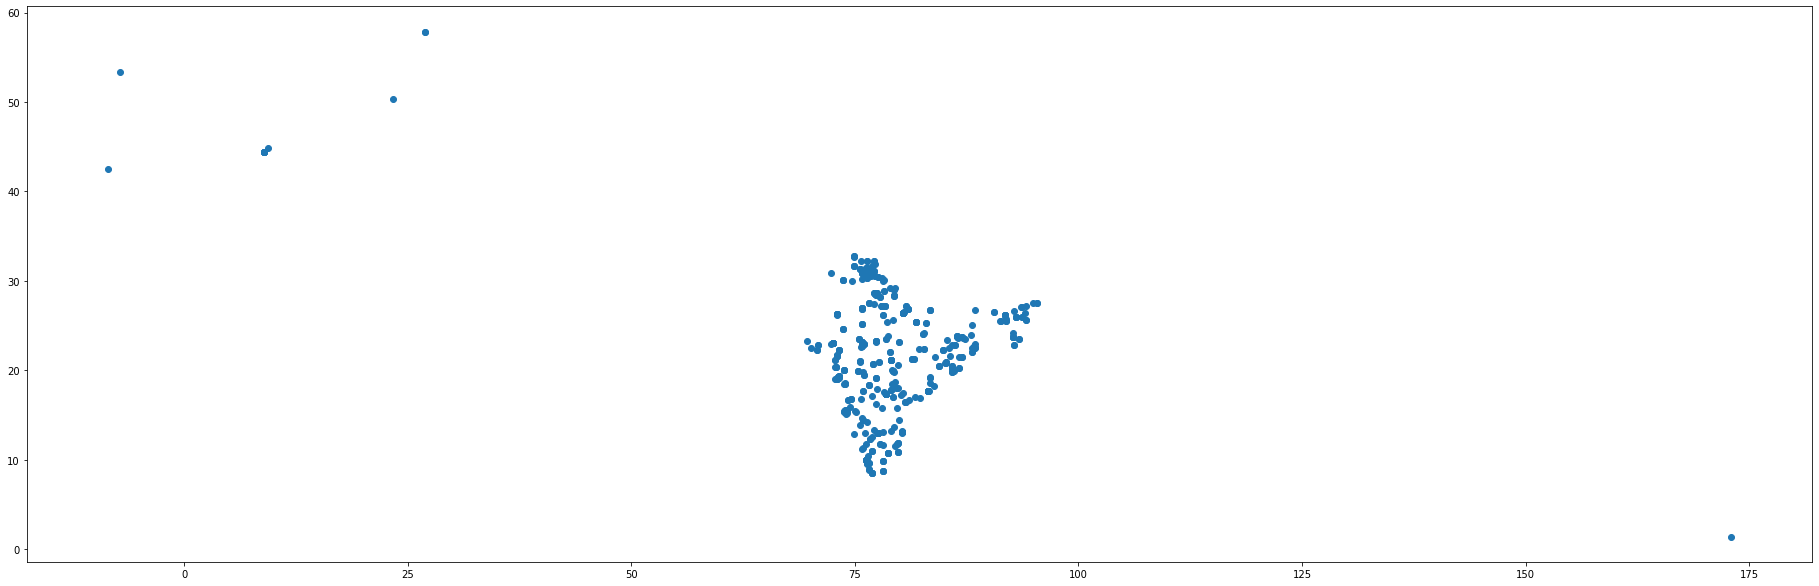

In [4]:
pollution_geom.plot(figsize = (32,32))

<AxesSubplot:>

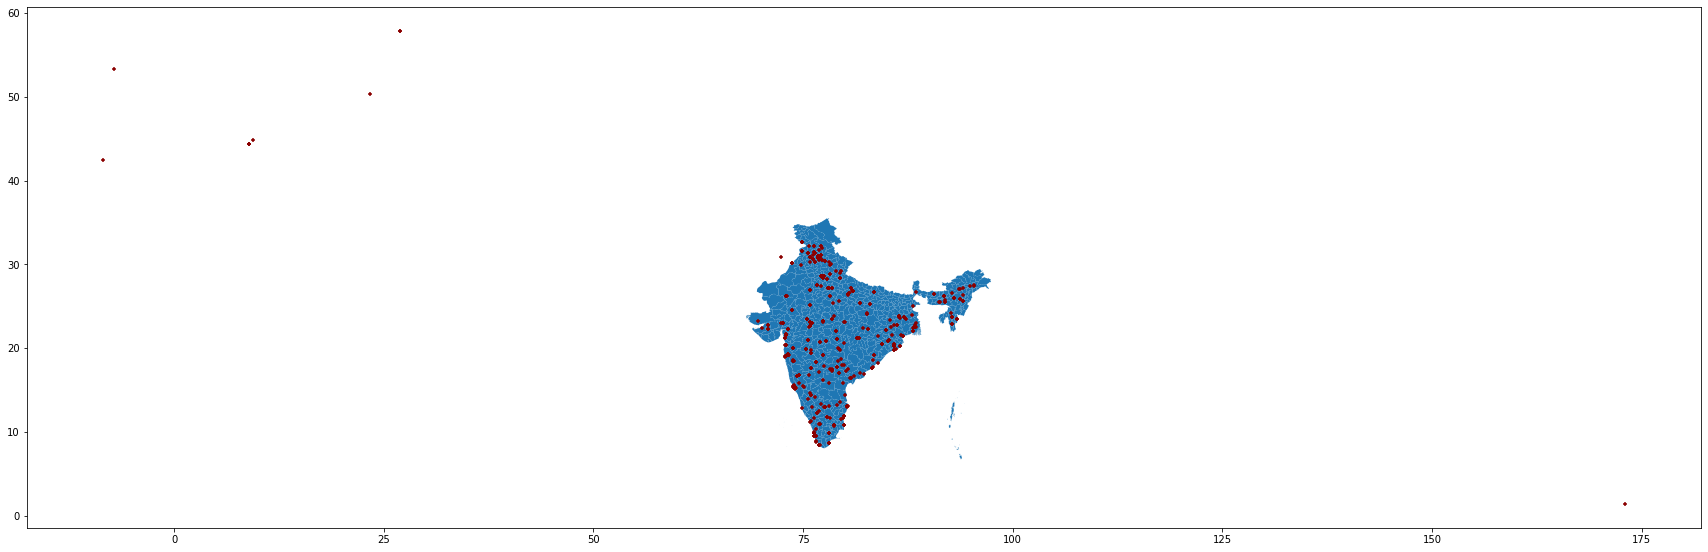

In [10]:
fig, ax = plt.subplots(1, figsize=(30,30))
base = india_districts.plot(ax=ax)
pollution_geom.plot(ax=base, color='darkred', markersize=20, marker='+')